In [21]:
from modules import *
from mlp_numpy import MLP

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn import metrics
import matplotlib.pyplot as plt
import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

SEED = 27

In [22]:
NUM_POINTS = 2000
N_CLASSES = 2
N_HIDDEN = [5, 10]

MAX_EPOCHS = 200
LR = 1e-2
BATCH_SIZE = 8

VERBOSE = 10

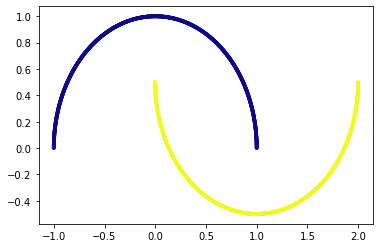

In [23]:
x, y = make_moons(NUM_POINTS, random_state=SEED)
plt.scatter(x[:, 0], x[:, 1], c=y, s=8, cmap="plasma")
plt.show()

y = np.eye(N_CLASSES)[y]
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=SEED);

In [24]:
mlp = MLP(x.shape[1], N_HIDDEN, N_CLASSES)
loss = CrossEntropy()

np.random.seed(SEED)

print("Train set shape", x_train.shape)
num_batches=len(x_train)//BATCH_SIZE
print("Num of batches =", num_batches)

for epoch in range(MAX_EPOCHS):
    random_index=np.random.choice(len(x_train), size=len(x_train), replace=False)
    for i in range(num_batches):
        batch_index=random_index[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        x_batch=x_train[batch_index]
        y_batch=y_train[batch_index]
        
        out_batch=mlp.forward(x_batch)
        loss_grad=loss.backward(out_batch, y_batch)
        trash=mlp.backward(loss_grad)
        
        for layer in mlp.layers:
            n=0
            if isinstance(layer, Linear):
                layer.params["weight"]-=LR*layer.grads["weight"]
                layer.params["bias"]-=LR*layer.grads["bias"]
    
    out_train=mlp.forward(x_train)
    train_loss=loss.forward(out_train, y_train)
    train_acc=metrics.accuracy_score(np.argmax(out_train, axis=1), np.argmax(y_train, axis=1))
    
    out_test=mlp.forward(x_test)
    test_loss=loss.forward(out_test, y_test)
    test_acc=metrics.accuracy_score(np.argmax(out_test, axis=1), np.argmax(y_test, axis=1))
    
    if (epoch+1)%VERBOSE==0:
        print(datetime.datetime.now(), "Epoch", epoch+1, "\tTrain Loss = %.5f" % train_loss, "Train acc = %.3f " % train_acc, "Test Loss = %.5f" % test_loss, "Test acc = %.3f " % test_acc)

Train set shape (1600, 2)
Num of batches = 200
2022-02-28 20:43:48.757063 Epoch 10 	Train Loss = 0.08875 Train acc = 0.969  Test Loss = 0.08415 Test acc = 0.975 
2022-02-28 20:43:49.746772 Epoch 20 	Train Loss = 0.04417 Train acc = 0.998  Test Loss = 0.04179 Test acc = 0.998 
2022-02-28 20:43:50.657333 Epoch 30 	Train Loss = 0.02432 Train acc = 1.000  Test Loss = 0.02320 Test acc = 1.000 
2022-02-28 20:43:51.563931 Epoch 40 	Train Loss = 0.01412 Train acc = 1.000  Test Loss = 0.01416 Test acc = 1.000 
2022-02-28 20:43:52.466530 Epoch 50 	Train Loss = 0.00805 Train acc = 1.000  Test Loss = 0.00852 Test acc = 1.000 
2022-02-28 20:43:53.340197 Epoch 60 	Train Loss = 0.00541 Train acc = 1.000  Test Loss = 0.00582 Test acc = 1.000 
2022-02-28 20:43:54.231829 Epoch 70 	Train Loss = 0.00400 Train acc = 1.000  Test Loss = 0.00433 Test acc = 1.000 
2022-02-28 20:43:55.135270 Epoch 80 	Train Loss = 0.00315 Train acc = 1.000  Test Loss = 0.00343 Test acc = 1.000 
2022-02-28 20:43:56.012961 Epoch 

In [25]:
np.argmax([[0.2, 0.3, 0.5], [0.2, 0.7, 0.1]], axis=1)

array([2, 1], dtype=int64)